In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C://Users//nikhi//OneDrive//Desktop//Admission_Predict.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df = df.drop(['Serial No.'], axis =1)

In [11]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


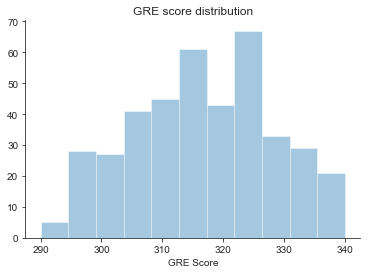

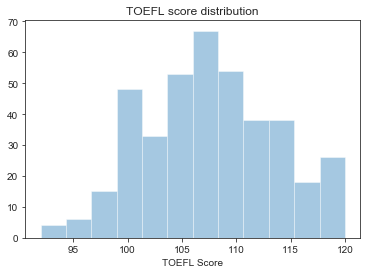

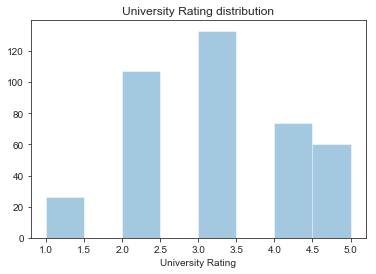

In [23]:
graph = sns.distplot(df['GRE Score'], kde= False)
plt.title('GRE score distribution')
sns.set_style('whitegrid')
sns.set_style('ticks')
sns.despine()
plt.show()

graph1 = sns.distplot(df['TOEFL Score'], kde= False)
plt.title('TOEFL score distribution')
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.show()

graph1 = sns.distplot(df['University Rating'], kde= False)
plt.title('University Rating distribution')
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.show()

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


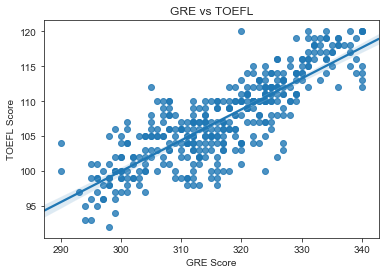

In [24]:
fig = sns.regplot(x='GRE Score', y = 'TOEFL Score', data = df)
plt.title("GRE vs TOEFL")
plt.show()

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


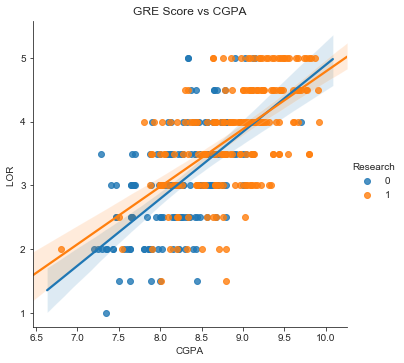

In [25]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

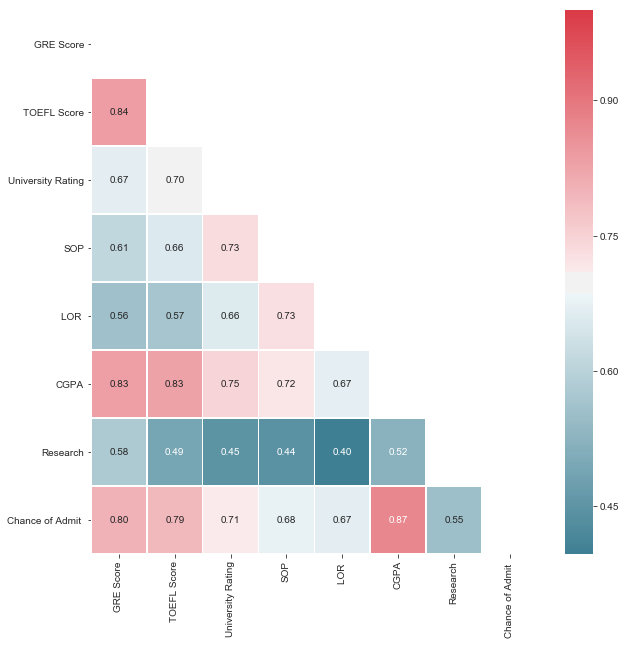

In [31]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(cor)
dropSelf[np.triu_indices_from(dropSelf)]= True
sns.heatmap(cor, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

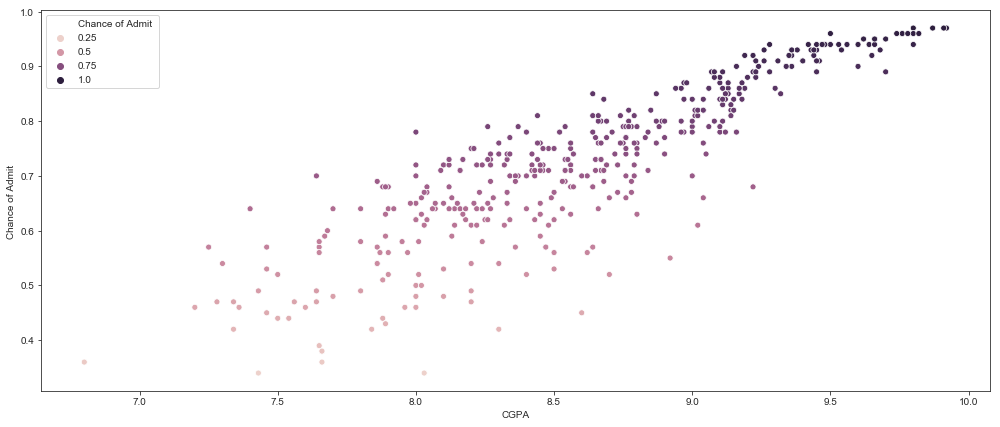

In [61]:
plt.figure(figsize=(17,7))
sns.scatterplot(df['CGPA'],df['Chance of Admit '],hue=df['Chance of Admit '])

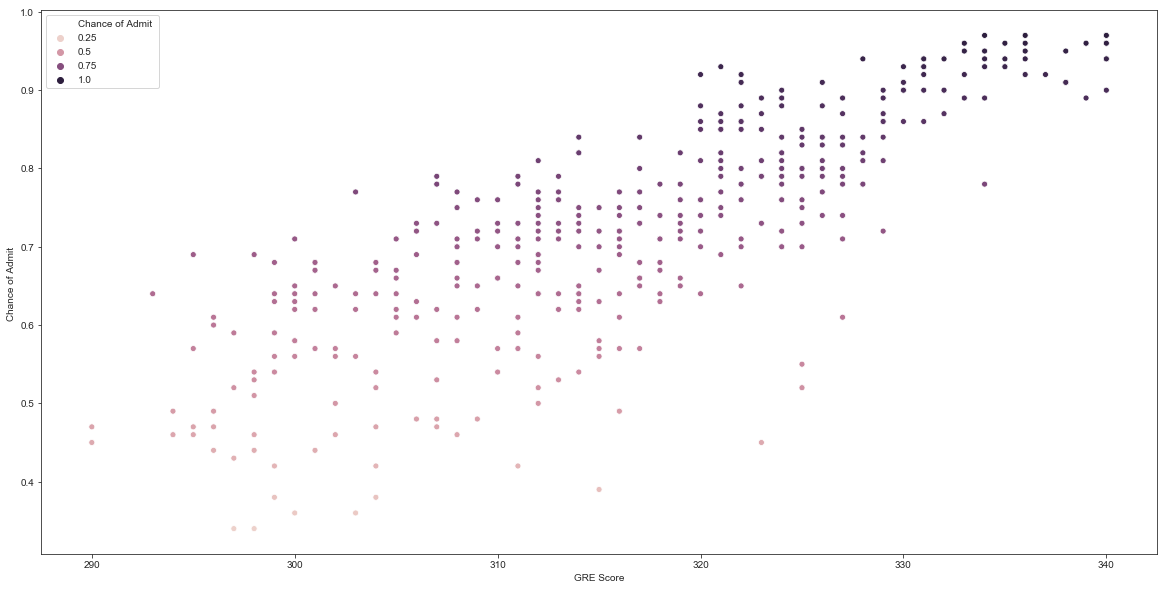

In [65]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['GRE Score'],df['Chance of Admit '], hue = df['Chance of Admit '])

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


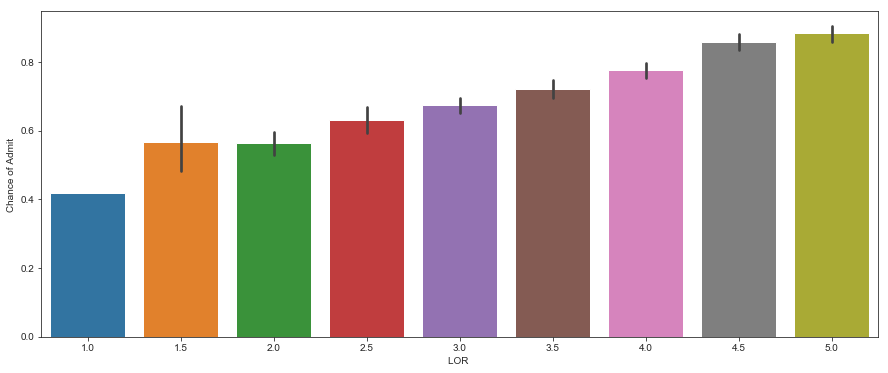

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(df['LOR '],df['Chance of Admit '])

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [72]:
#comparing some algorithms and the way they fit
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
models = [['Decision Tree:', DecisionTreeRegressor()],
            ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)]]
print('Predictions:')

for name,model in models:
    model= model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, np.sqrt(mean_squared_error(y_test, predictions)))

Predictions:
Decision Tree: 0.09481561052906848
Linear Regression : 0.06473311695782089
RandomForest : 0.07062612830957109
KNeighbours : 0.083342291185208


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
#Checking of LinearRegression gives a better fit comparitively
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(X,y)

prediction = regress.predict(X_test)
regress.score(X,y)


0.8034713719824393

In [43]:
rf = RandomForestRegressor()
rf.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = rf.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending = True)




C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


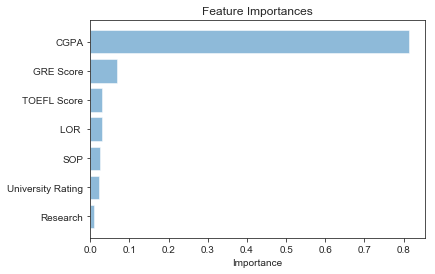

In [60]:
#visualizing important features in a bar graph
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
mse = mean_squared_error(predictions,y_test)
mae = mean_absolute_error(predictions,y_test)
msle = mean_squared_log_error(predictions,y_test)
print("mean_squared_error : %f\nmean_absolute_error : %f\nmean_squared_log_error : %f"%(mse,mae,msle))

mean_squared_error : 0.010801
mean_absolute_error : 0.084233
mean_squared_log_error : 0.004065
